# Linear Regression Practice

For this exercise, you've been provided with a csv file, gdp_le.csv, which contains the gdp per capita and life expectancy values that you were working with on the UN data exercise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.tsa import stattools
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy as sp
from scipy.stats import probplot

In [2]:
gdp_le = pd.read_csv('../data/gdp_le.csv')
gdp_le.head(2)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575


#### Start by fitting a linear regression model with target being life expectancy and predictor variable year.

In [51]:
year_vs_le = smf.ols("Life_Expectancy ~ Year", data=gdp_le).fit()

#### a. What coefficients do you get? Interpret the meaning of these coefficents.

In [52]:
year_vs_le.params

Intercept   -468.138140
Year           0.267722
dtype: float64

Our increase will be 0.2677(Year) starting at -468.138 on the Life Expectancy.

- the formula would fill as: $$Mean(Life\_Expectancy) = -468.138140 + 0.267722(Year)$$ meaning each increase in one unit on average the Life Expectancy increases by ~0.267722 years.  

#### b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can the patsy identity function to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?

In [53]:
lm = smf.ols(formula='Life_Expectancy ~ I(Year - 1990)', data=gdp_le).fit()
lm.params

Intercept         64.628889
I(Year - 1990)     0.267722
dtype: float64

In 1990, Our increase will be 0.2678/Year starting at 64.628 on the Life Expectancy. Which I beleive is statistically signifigant. 

In [6]:
print(lm.summary())
print(f'Breusch-Pagan: {sms.het_breuschpagan(lm.resid, lm.model.exog)}');
print(f'Jarque-Bera: {sms.jarque_bera(lm.resid)}');
print(f'Durbin-Watson: {sms.durbin_watson(lm.resid)}');
print(f'Omnibus: {sms.omni_normtest(lm.resid)}');

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           8.13e-91
Time:                        20:57:52   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.6289      0.245    263.

**Interpretations**  

- The new model shifted to the year 1990 corresponding with the value of 0, the only difference in the two models is a transposition. The slope coefficient is the same in both models, the intercept is different based on whether the model takes the year 1990 as the value of 1990 or the value of 0.  
- The p-value for the coefficients is approximately zero, indicating that the coefficients are statistically significant.   

Durbin-Watson = 0.058  

**P-values**  
Breusch-Pagan = 1.62e-23  
Jarque-Bera = 1.34e-102   
Omnibus = 7.5e-85    

- We should use caution when interpreting whether the coefficients are statistically significant because they violate the LINE requirements. 

#### c. Compare the actual mean life expectancy per year to the model's estimate. How well does it do?

In [7]:
means_per_year = gdp_le.groupby('Year')['Life_Expectancy'].mean().reset_index()
means_per_year['mean_estimate'] = lm.predict(means_per_year)
means_per_year.head(5)

,Year,Life_Expectancy,mean_estimate
0,1990,64.745253,64.628889
1,1991,65.021276,64.896612
2,1992,65.217845,65.164334
3,1993,65.218031,65.432056
4,1994,65.339539,65.699778


The model is very close

d. Plot the actual values against your model's estimates for the mean life expectancy.

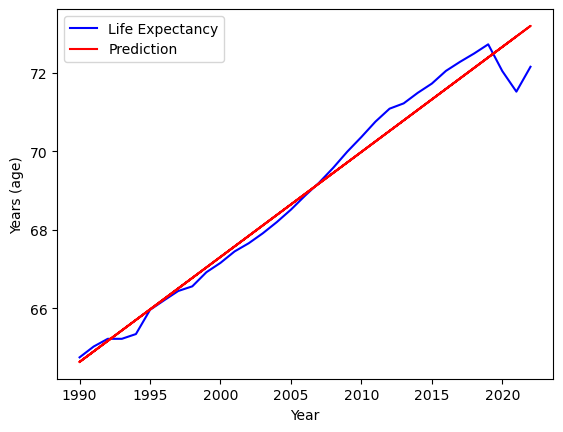

In [8]:
means_per_year.plot(kind = 'line', x= 'Year', y = 'Life_Expectancy', color = 'blue')
plt.plot(gdp_le['Year'], lm.fittedvalues, color = 'red')
plt.ylabel('Years (age)')
plt.legend(['Life Expectancy', 'Prediction']);

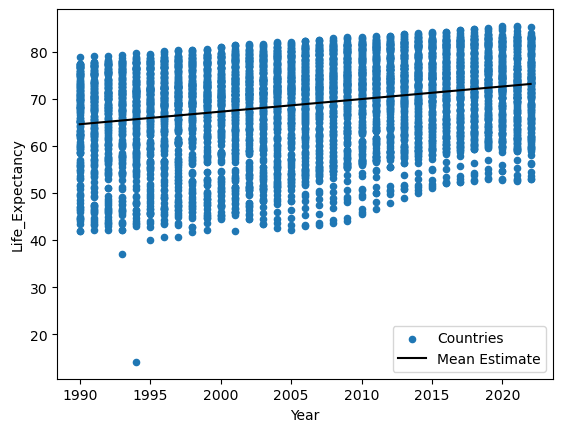

In [9]:
fig, ax = plt.subplots()
gdp_le.plot(kind='scatter', x='Year', y='Life_Expectancy', ax=ax)
means_per_year.plot(x='Year', y='mean_estimate', ax=ax, color='black')
plt.legend(['Countries', 'Mean Estimate']);

e. Inspect the R-squared value for the model. does it make sense, given the plot?

In [10]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           8.13e-91
Time:                        20:57:52   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.6289      0.245    263.308      0.000      64.148      65.110
I(Year - 1990)     0.2677      0.013     20.591      0.000       0.242       0.293
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
print(f'variance of residuals is {lm.resid.var()}')
print(f'vairance of Life_Expectancy is {gdp_le['Life_Expectancy'].var()}')

variance of residuals is 82.3971125224111
vairance of Life_Expectancy is 88.74671724809251


The R-squared values make sense because they should be very similar, based on what I did. 
There is a lot of variation left to be explained because there is slightly less variation.

### Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.

In [12]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == 2021].copy()
gdp_le_2021.head(2)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
21,Albania,2021,14595.944386,Europe,76.463


In [13]:
lm_2021= smf.ols("Life_Expectancy ~ GDP_Per_Capita", data=gdp_le_2021).fit()
lm_2021.params

Intercept         65.949870
GDP_Per_Capita     0.000257
dtype: float64

a. What coefficients do you get? Interpret the meaning of those coefficients.

Our increase will be 0.000257 starting at 65.949 on the Life Expectancy.

#### b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients?

In [14]:
lm_2021_adjusted = smf.ols('Life_Expectancy ~ I(GDP_Per_Capita/1000)', data=gdp_le_2021).fit()
lm_2021_adjusted.params

Intercept                   65.949870
I(GDP_Per_Capita / 1000)     0.256892
dtype: float64

In [15]:
lr_gdp_2021_dollars= smf.ols("I(GDP_Per_Capita / 1000) ~ GDP_Per_Capita", data=gdp_le_2021).fit()
lr_gdp_2021_dollars.params

Intercept        -1.924117e-14
GDP_Per_Capita    1.000000e-03
dtype: float64

I used a log transformation to essentially change the magnitude of our units, meaning one unit increase ($1000) in GDP per capita results in a 0.256892 increase in mean life expectancy. 

#### c. Are the coefficients statistically significant?

In [16]:
lm_2021_adjusted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           6.81e-32
Time:                        20:57:53   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   65.9499      0.549    120.225      0.000      64.867      67.033
I(GDP_Per_Capita / 1000)     0.2569      0.018     14.608      0.000       0.222       0.292
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coefficients are not statistically significant because the P-values are near 0.

d. What does your model estimate for the mean life expectancy for a country whose gdp per capita is 50,000 dollars? What about one whose gdp per capita is 100,000 dollars?

In [17]:
predictor = lm_2021_adjusted.params['I(GDP_Per_Capita / 1000)']
intercept = lm_2021_adjusted.params['Intercept']
mean_le_50k = predictor * 50 + intercept
mean_le_100k = predictor * 100 + intercept
[mean_le_50k, mean_le_100k, (mean_le_100k/mean_le_50k)]

[np.float64(78.7944572464132),
 np.float64(91.63904465544815),
 np.float64(1.1630138446016092)]

The country with GDP per capita of 100,000 dollars has more than 10 years life expectancy of a country with GDP per Capita of 50,000 dollars

#### e. Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit?

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
21,Albania,2021,14595.944386,Europe,76.463
54,Algeria,2021,11029.138782,Africa,76.377
87,Angola,2021,5911.835657,Africa,61.643
120,Antigua and Barbuda,2021,19899.882425,North America,78.497
...,...,...,...,...,...
5344,Uzbekistan,2021,7800.501501,Asia,70.862
5377,Vanuatu,2021,2800.493866,Oceania,70.449
5410,West Bank and Gaza,2021,5641.044400,Asia,73.473
5439,Zambia,2021,3236.788981,Africa,61.223


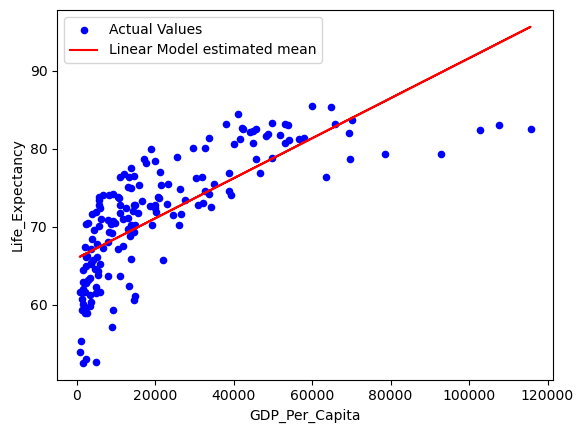

In [18]:
display(gdp_le_2021)
gdp_le_2021.plot(kind = 'scatter', x= 'GDP_Per_Capita', y = 'Life_Expectancy', color = 'blue')
plt.plot(gdp_le_2021['GDP_Per_Capita'], lm_2021_adjusted.fittedvalues, color = 'red')
plt.legend(['Actual Values', 'Linear Model estimated mean']);

This shows a positive association between the two variables, but it does not fit well in the current form. 

### Now, fit a model for life expectancy based on the log of gdp per capita.

In [19]:
lm_2021_log = smf.ols('Life_Expectancy ~ I(np.log(GDP_Per_Capita))', data=gdp_le_2021).fit()

a. Inspect the coefficients for this model. Are they statistically significant? 

In [20]:
lm_2021_log.params

Intercept                    18.946970
I(np.log(GDP_Per_Capita))     5.589014
dtype: float64

In [21]:
lm_2021_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     432.6
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.06e-48
Time:                        20:57:53   Log-Likelihood:                -490.22
No. Observations:                 173   AIC:                             984.4
Df Residuals:                     171   BIC:                             990.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    18.9470      2.547      7.438      0.000      13.919      23.975
I(np.log(GDP_Per_Capita))     5.5890      0.269     20.798      0.000       5.059       6.119
==============================================================================
Omnibus:                       16.862   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.922
Skew:                          -0.725   Prob(JB):                     7.78e-05
Kurtosis:                       3.725   Cond. No.                         77.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretations** 

The p-value(near zero) is statistically significant; therefore it is unlikely that the relationship between GDP per capita and life expectancy shown is due to chance. Lets look at our other linear regression statistics. 

**Notable Statistics**  
- **Durbin-Watson** = 1.974  *a value near 2 indicates very little autocorrelation in the residuals, indicating independence in errors*  
- **Jarque-Bera** = 18.922, **JB p-value** = 7.78e-05  *a high JB and a near zero p-value indicate that this data did not come from a normal distribution, meaning we'll need to further investigate.  
- **Skew** = -0.725  *this indicates a slight left skew, which is not indicative of a normal distribution*  
- **Kurtosis** = 3.725  *this indicates a leptokurtic distribution, meaning there is an increased likelihood that outliers are impacting the shape of the distribution* 

#### b. Interpret these coefficients. What does the model estimate for the average life expectancy for countries with a gdp per capita of 50,000 dollars? What about for those with a gdp per capita of 100,000 dollars? 

the predicted model is: $$Mean(Life\_Expectancy) = 18.946970 + 5.589014(log(GDP\_Per\_Capita))$$  

In [22]:
predictor = lm_2021_log.params['I(np.log(GDP_Per_Capita))']
intercept = lm_2021_log.params['Intercept']
mean_le_50k_log = predictor * np.log(50000) + intercept
mean_le_100k_log = predictor * np.log(100000) + intercept
[mean_le_50k_log, mean_le_100k_log, (mean_le_100k_log/mean_le_50k_log)]

[np.float64(79.41886072606525),
 np.float64(83.29286991695194),
 np.float64(1.048779460640327)]

In [23]:
print(f' The estimate for the average life expectancy for countries with a gdp per capita of 50,000 dollars is {mean_le_50k_log} years.')
print(f' The estimate for the average life expectancy for countries with a gdp per capita of 100,000 dollars is {mean_le_100k_log} years.')

 The estimate for the average life expectancy for countries with a gdp per capita of 50,000 dollars is 79.41886072606525 years.
 The estimate for the average life expectancy for countries with a gdp per capita of 100,000 dollars is 83.29286991695194 years.


#### c. Plot the actual values compared to your models' estimates for the mean life expectancy. How does this compare to the non-logged model?

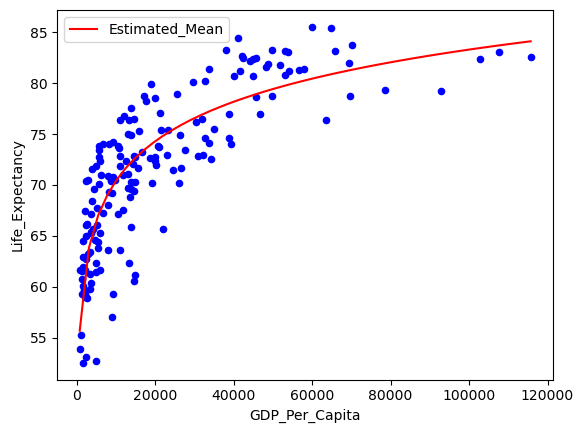

In [24]:
mean_estimates_df = pd.DataFrame(
    {'GDP_Per_Capita' : np.linspace(gdp_le_2021['GDP_Per_Capita'].min(), 
                                    gdp_le_2021['GDP_Per_Capita'].max())}
)
mean_estimates_df['Estimated_Mean'] = lm_2021_log.predict(mean_estimates_df)

fig, ax = plt.subplots()
gdp_le_2021.plot(kind = 'scatter', 
                 x= 'GDP_Per_Capita', 
                 y = 'Life_Expectancy', 
                 color = 'blue', 
                 ax=ax)
mean_estimates_df.plot(x='GDP_Per_Capita', 
                       y='Estimated_Mean', 
                       ax=ax, 
                       color='red');

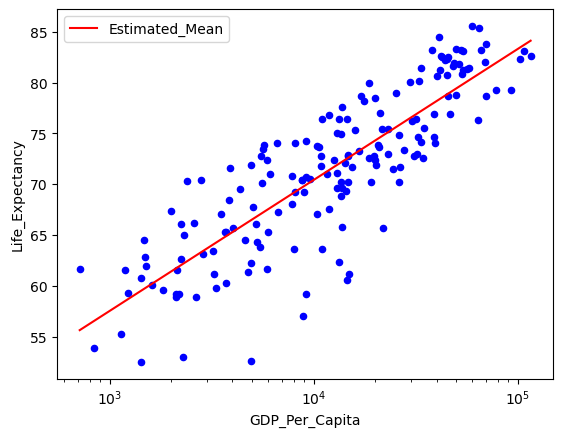

In [25]:
fig, ax = plt.subplots()
gdp_le_2021.plot(kind = 'scatter', 
                 x= 'GDP_Per_Capita',
                 y = 'Life_Expectancy', 
                 color = 'blue', 
                 ax=ax,
                 logx=True)
mean_estimates_df.plot(x='GDP_Per_Capita',
                       y='Estimated_Mean',
                       ax=ax, color='red', 
                       logx=True);

### Finally, return to the full dataset.

a. First, fit a linear regression model for life expectancy based on the log of gdp per capita. 

In [26]:
gdp_le['log_GDP_Per_Capita'] = np.log(gdp_le['GDP_Per_Capita'])
log_gdp_lm= smf.ols("Life_Expectancy ~ log_GDP_Per_Capita", data=gdp_le).fit()
log_gdp_lm.params

Intercept             9.194102
log_GDP_Per_Capita    6.531130
dtype: float64

b. Then, add the year variable to your model. How can you interpret the coefficient associated with year? What limitations or weaknesses might this model have?

In [27]:
log_gdp_lm_year= smf.ols("Life_Expectancy ~ log_GDP_Per_Capita + I(Year-1990)", data=gdp_le).fit()
log_gdp_lm_year.params

Intercept             8.561151
log_GDP_Per_Capita    6.359936
I(Year - 1990)        0.134487
dtype: float64

In [28]:
log_gdp_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                 1.288e+04
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:57:53   Log-Likelihood:                -16834.
No. Observations:                5504   AIC:                         3.367e+04
Df Residuals:                    5502   BIC:                         3.369e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              9.1941      0.532     17.297      0.000       8.152      10.236
log_GDP_Per_Capita     6.5311      0.058    113.506      0.000       6.418       6.644
==============================================================================
Omnibus:                     1066.762   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2391.301
Skew:                          -1.108   Prob(JB):                         0.00
Kurtosis:                       5.349   Cond. No.                         71.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
log_gdp_lm_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     7014.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):               0.00
Time:                        20:57:53   Log-Likelihood:                -16668.
No. Observations:                5504   AIC:                         3.334e+04
Df Residuals:                    5501   BIC:                         3.336e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.5612      0.517     16.563      0.000       7.548       9.574
log_GDP_Per_Capita     6.3599      0.057    112.387      0.000       6.249       6.471
I(Year - 1990)         0.1345      0.007     18.525      0.000       0.120       0.149
==============================================================================
Omnibus:                     1096.440   Durbin-Watson:                   0.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2582.760
Skew:                          -1.116   Prob(JB):                         0.00
Kurtosis:                       5.506   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
means = gdp_le.groupby('Year')[['Life_Expectancy', 'log_GDP_Per_Capita']].mean().reset_index()
means.head(5)

,Year,Life_Expectancy,log_GDP_Per_Capita
0,1990,64.745253,8.837510
1,1991,65.021276,8.834962
2,1992,65.217845,8.844434
3,1993,65.218031,8.838053
4,1994,65.339539,8.828003


In [31]:
display(sms.anova_lm(log_gdp_lm_year, typ=2))
display(sms.anova_lm(log_gdp_lm, log_gdp_lm_year))

,sum_sq,df,F,PR(>F)
log_GDP_Per_Capita,315865.086680,1.0,12630.817342,0.000000e+00
I(Year - 1990),8582.183604,1.0,343.184474,2.273290e-74
Residual,137566.223531,5501.0,NaN,NaN


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,5502.0,146148.407135,0.0,NaN,NaN,NaN
1,5501.0,137566.223531,1.0,8582.183604,343.184474,2.273290e-74


Limitations: year only serves as a predictor and restricts the sample from being a random sample. It is not a random sample because our observations are not independent.

P-Value: indicates that it is statistically significant and the year is not a good predictor variable.

# Linear Regression Practice Stretch Questions

#### 1. So far, we've looked at the effect of gdp per capita alone on life expectancy. Let's see what happens if we also consider the continent variable. For this question, return to the 2021 subset.  
  

In [39]:
gdp_le_2021['log_GDP_Per_Capita'] = np.log(gdp_le_2021['GDP_Per_Capita'])
gdp_le_2021.head(2)

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,log_GDP_Per_Capita
0,Afghanistan,2021,1517.016266,Asia,61.982,7.324501
21,Albania,2021,14595.944386,Europe,76.463,9.588499


  a. Fit a model for life expectancy using log of gdp per capita and continent. How does this compare to the model that just used log of gdp per capita? Interpret the meaning of the coefficients you get with this new model.  
 

In [41]:
lm_2021_continents= smf.ols("Life_Expectancy ~ log_GDP_Per_Capita + I(Continent)", data=gdp_le_2021).fit()
lm_2021_continents.params

Intercept                        25.883441
I(Continent)[T.Asia]              5.183673
I(Continent)[T.Europe]            5.104175
I(Continent)[T.North America]     4.175711
I(Continent)[T.Oceania]           4.765647
I(Continent)[T.South America]     2.759830
log_GDP_Per_Capita                4.484066
dtype: float64

In [43]:
lm_2021_continents.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     91.22
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           5.93e-50
Time:                        21:04:51   Log-Likelihood:                -473.20
No. Observations:                 173   AIC:                             960.4
Df Residuals:                     166   BIC:                             982.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        25.8834      2.885      8.973      0.000      20.188      31.579
I(Continent)[T.Asia]              5.1837      0.958      5.408      0.000       3.291       7.076
I(Continent)[T.Europe]            5.1042      1.104      4.625      0.000       2.925       7.283
I(Continent)[T.North America]     4.1757      1.083      3.854      0.000       2.037       6.315
I(Continent)[T.Oceania]           4.7656      1.251      3.809      0.000       2.295       7.236
I(Continent)[T.South America]     2.7598      1.367      2.019      0.045       0.060       5.459
log_GDP_Per_Capita                4.4841      0.343     13.056      0.000       3.806       5.162
==============================================================================
Omnibus:                        2.686   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                2.693
Skew:                          -0.298   Prob(JB):                        0.260
Kurtosis:                       2.863   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### The coefficients each have their own starting point if we were to graph them. They are all statistically significant because they are near zero. 

   b. Now, add an interaction term between continent and log gdp per capita. Are the interaction terms statistically significant? Interpret the meaning of the interaction terms.

#### 2. The data that we are working with is time series data, which means that it contains measurements of the same variable collected over time. This can lead to violations of the linear regression model assumptions. Namely, the errors may not be independent. Let's investigate further and see how this could be corrected by restructuring our model.  
  

  a. Fit a linear regression model with target being gdp per capita and predictor being year using just the data for the United States.

In [48]:
USA = gdp_le[gdp_le['Country'] == 'United States']

In [49]:
lm_USA= smf.ols("Life_Expectancy ~ Year", data=USA).fit()
lm_USA.params

Intercept   -119.536160
Year           0.098117
dtype: float64

b. Inspect the residuals for this model. Look at the correlation between the residual for a given year and the residual for the next year. Is there a statistically significant correlation?

In [50]:
print(lm_USA.summary())
print(f'Breusch-Pagan: {sms.het_breuschpagan(lm_USA.resid, lm_USA.model.exog)}');
print(f'Jarque-Bera: {sms.jarque_bera(lm_USA.resid)}');
print(f'Durbin-Watson: {sms.durbin_watson(lm_USA.resid)}');
print(f'Omnibus: {sms.omni_normtest(lm_USA.resid)}');

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     49.80
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           6.32e-08
Time:                        21:29:12   Log-Likelihood:                -36.758
No. Observations:                  33   AIC:                             77.52
Df Residuals:                      31   BIC:                             80.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -119.5362     27.890     -4.286      0.0

c. A common technique for modeling time series data is the [ARIMA model](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average). For an in-depth discussion of ARIMA models, see https://otexts.com/fpp2/arima.html. The first thing to check is whether we have a stationary series. This can be done using the [Augmented Dickey-Fuller test](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html). We want to reject the null hypothesis before we proceed, because failing to reject implies that the series is not stationary. Run the adfuller test on the gdp per capita values for the US.

d. If a series is not stationary, it can be replaced by the series of differences from one time period to the next. See if the series of differences in stationary. Plot the series of differences and run the adfuller test.

e. Since the series of differences is stationary, we know that we need an integration term of 1. You also want to check the autocorrelation function, which can be done using the [plot_acf function](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html#statsmodels.graphics.tsaplots.plot_acf). Are there any significant autocorrelations? 

f. Since there were not significant autocorrelations, an ARIMA(0,1,0) model may be appropriate. Try fitting an ARIMA(0,1,0) model using https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html#statsmodels.tsa.arima.model.ARIMA. Try one with no trend and one with a linear trend (using the trend parameter). Compare these models on the basis of the [AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion). Which does better?

g. Compare the estimate and confidence interval for the trend from the ordinary least squares regression model and the ARIMA model. Which has a greater standard error?

#### 3. Another way that we can model our data is using [fixed effects](https://theeffectbook.net/ch-FixedEffects.html), which allows us to control for all variables, whether they are observed or not. Let's say we want to isolate the effect of gdp per capita on life expectancy, after controlling for differences between countries. 
 

   a. One way to do this is to fit a model which contains a dummy variable for each country. Do this and inspect the coefficient for log gdp per capita.

    b. A second option is to convert our original variables (log gdp per capita and life expectancy) to the difference from the country-level mean for these varaiables. Hint: you may want to use groupby + transform in order to find the difference from the country-level mean for the variables. How does the coefficient for log gdp per capita compare to the one using a dummy variable for each country? 

#### 4. Finally, when working with panel data, it is common to use a linear mixed model. A good resource on mixed models is this set of course notes from Penn State University: https://online.stat.psu.edu/stat502_fa21/lesson/6 or Chapters 8 and 9 of [Beyond Multiple Linear Regression](https://bookdown.org/roback/bookdown-BeyondMLR/ch-multilevelintro.html).  
    

a. Fit a model for just the united states with predictor variable Year and target life expectancy. Inspect the parameters.  

    b. Then iterate through all countries and gather up the parameters. Look at the distribution of model parameters across all countries.  

    c. Find the correlation between slope and intercept. What might this suggest?  

    d. Group by continent and look at the distribution of slopes and intercepts. What do you notice?  

    e. Using [mixedlm](https://www.statsmodels.org/stable/examples/notebooks/generated/mixed_lm_example.html) from statsmodels, fit a linear mixed effects model with groups being the country and random effects the year and log gdp per capita. Inspect the results and compare them to what you noticed above.  